<a href="https://colab.research.google.com/github/bigchico25/Data_Analysis_MongoDB/blob/master/Conversations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Lê o arquivo JSON e cria um DataFrame
df = pd.read_json('conversations.json')

# Extrai a data da coluna "receivedTimestamp"
df['Data'] = pd.to_datetime(df['receivedTimestamp'].apply(lambda x: x['$date'][:10]))

# Solicita ao usuário que digite a data inicial desejada (formato: YYYY-MM-DD)
data_inicial_str = input('Digite a data inicial desejada (formato: YYYY-MM-DD): ')
data_inicial = pd.to_datetime(data_inicial_str)

# Solicita ao usuário que digite a data final desejada (formato: YYYY-MM-DD ou "hoje" para mostrar todas as conversas a partir da data inicial)
data_final_str = input('Digite a data final desejada (formato: YYYY-MM-DD ou "hoje"): ')
if data_final_str.lower() == 'hoje':
    data_final = pd.to_datetime('today').normalize()
else:
    data_final = pd.to_datetime(data_final_str)

# Filtra as conversas que se iniciaram entre as datas escolhidas pelo usuário
filtro = df.loc[(df['Data'] >= data_inicial) & (df['Data'] <= data_final)]

# Agrupa a quantidade de conversas por restaurante
total = filtro.groupby('storeMenuSlug').size().sort_values(ascending=False)

# Calcula o total de conversas entre as datas escolhidas
total_conversas = len(filtro)

# Formata a tabela
styled_table = total.to_frame().style \
    .background_gradient(cmap='Blues', low=.5, high=0).highlight_max(color='green') \
    .set_caption(f'Quantidade de conversas por restaurante entre {data_inicial_str} e {data_final_str}') \
    .set_properties(**{'text-align': 'center'})

# Exibe a tabela formatada e o total de conversas
display(styled_table)
print(f'Total de conversas entre {data_inicial_str} e {data_final_str}: {total_conversas}')

Digite a data inicial desejada (formato: YYYY-MM-DD): 2023 04 25
Digite a data final desejada (formato: YYYY-MM-DD ou "hoje"): hoje


,0
storeMenuSlug,
katialanches,336
mariazzinha,268
pizzaria-sao-francisco,255
paneladebarro,225
docedeguste,137
paomania,74
paomaniabarcelona,60
pinklemonade,38
benca-gelato,36


Total de conversas entre 2023 04 25 e hoje: 1474


Digite a data inicial desejada (formato: YYYY-MM-DD): 2023 04 25
Digite a data final desejada (formato: YYYY-MM-DD ou "hoje"): hoje


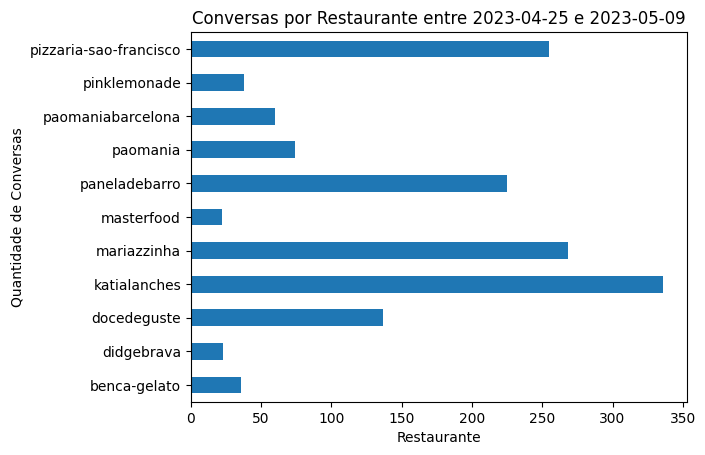

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lê o arquivo JSON e cria um DataFrame
df = pd.read_json('conversations.json')

# Extrai a data da coluna "receivedTimestamp"
df['Data'] = pd.to_datetime(df['receivedTimestamp'].apply(lambda x: x['$date'][:10]))

# Solicita ao usuário que digite a data inicial desejada (pode ser deixado em branco para ver a quantidade total de conversas)
data_inicial = input('Digite a data inicial desejada (formato: YYYY-MM-DD): ')

# Verifica se a data inicial foi preenchida pelo usuário
if not data_inicial:
    data_inicial = df['Data'].min()
else:
    data_inicial = pd.to_datetime(data_inicial)

# Solicita ao usuário que digite a data final desejada (pode ser deixado em branco para ver a quantidade total de conversas até a data atual)
data_final = input('Digite a data final desejada (formato: YYYY-MM-DD ou "hoje"): ')

# Verifica se a data final foi preenchida pelo usuário
if not data_final:
    data_final = df['Data'].max()
elif data_final == 'hoje':
    data_final = pd.Timestamp.today()
else:
    data_final = pd.to_datetime(data_final)

# Filtra o DataFrame para mostrar apenas as conversas dentro do período selecionado pelo usuário
df = df[(df['Data'] >= data_inicial) & (df['Data'] <= data_final)]

# Agrupa o DataFrame pela coluna "storeMenuSlug" e conta o número de conversas em cada grupo
agrupado = df.groupby('storeMenuSlug')['receivedTimestamp'].count()

# Gera o gráfico de barras com a quantidade de conversas por restaurante
agrupado.plot(kind='barh')

# Define o título e os rótulos dos eixos
plt.title(f'Conversas por Restaurante entre {data_inicial.date()} e {data_final.date()}')
plt.xlabel('Restaurante')
plt.ylabel('Quantidade de Conversas')

# Exibe o gráfico
plt.show()